In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import curve_fit
from scipy import misc
import matplotlib.pyplot as plt
from pylab import * 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
import requests
import math
import re
import csv

## 2HDM (type IV) limits from the low mass dark photon search

### Evaluation of sinTheta limits starting from the upper limit on the cross section * BR * acceptance

`Acceptance` evaluated generating gg $\to$ A events with Pythia

`Cross section` computed using HiGLU+HDECAY generators
`Branching ratios` (A $\to \mu\mu$) retrieved from here: ([link](https://github.com/cecilecaillol/CMS_HAA_SummaryPlots/blob/master/BR/BR_IV_0.5.dat))

[0.00057627 0.00248433 0.07195629]


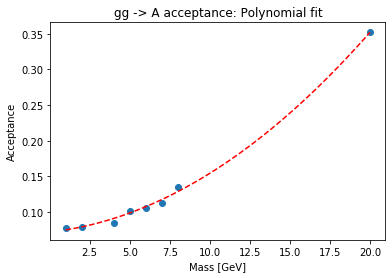

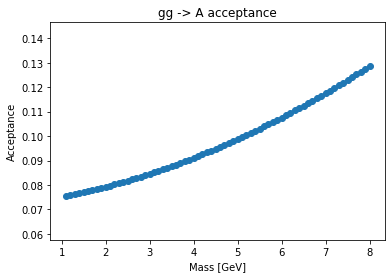

Mass points considered: 
 [1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8
 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6
 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4
 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8. ] 

and corresponding acceptance values: 
 [0.07538633618982175, 0.0757673107922394, 0.07615981078589108, 0.0765638361707768, 0.07697938694689657, 0.0774064631142504, 0.07784506467283824, 0.07829519162266013, 0.07875684396371607, 0.07923002169600604, 0.07971472481953007, 0.08021095333428813, 0.08071870724028023, 0.08123798653750637, 0.08176879122596656, 0.08231112130566078, 0.08286497677658905, 0.08343035763875135, 0.0840072638921477, 0.08459569553677809, 0.08519565257264253, 0.085807134999741, 0.08643014281807353, 0.08706467602764009, 0.08771073462844069, 0.08836831862047533, 0.089037428003744, 0.08971806277824673, 0.0904102229439835, 0.09111390850095431, 0.09182911944915917, 0.092

In [2]:
# ACCEPTANCE

mass = np.array([1., 2., 4., 5., 6., 7., 8., 20.])
acc_amumu = np.array([0.0774, 0.0798, 0.0847, 0.1017, 0.1061, 0.1132, 0.1355, 0.3518])
#v_acc = [(1., 0.0774), (2., 0.0798), (4., 0.0847), (5., 0.1017), (6., 0.1061), (7., 0.1132), (8., 0.1355), (20., 0.3518)]
#v_acc_x = [x[0] for x in v_acc]
#v_acc_y = [x[1] for x in v_acc]

p = polyfit(mass, acc_amumu, 2)
print(p)
x1 = linspace(1,20)
f1 = polyval(p,x1)
plt.plot(mass, acc_amumu, 'o')
plt.plot(x1,f1,'r--')
plt.xlabel('Mass [GeV]')
plt.ylabel('Acceptance')
plt.title('gg -> A acceptance: Polynomial fit')
plt.show()
#plt.savefig('ggA_acceptance_pol2.pdf', dpi=1200)
#plt.savefig('ggA_acceptance_pol2.png', dpi=1200)

f_acc_amumu = np.poly1d(p)
v_acc_amumu = []
for i in np.arange(start=1.1, stop=8.1, step=0.1):
    v_acc_amumu.append(f_acc_amumu(i))

v_mass = []
v_mass = np.arange(start=1.1, stop=8.1, step=0.1)

plt.scatter(v_mass, v_acc_amumu)
plt.plot(v_mass, v_acc_amumu)
plt.xlabel('Mass [GeV]')
plt.ylabel('Acceptance')
plt.title('gg -> A acceptance')
plt.show()
#plt.savefig('ggA_acceptance_tot.pdf', dpi=1200)
#plt.savefig('ggA_acceptance_tot.png', dpi=1200)

# LINEAR FIT
#m,q = np.polyfit(mass, acc_amumu, 1) 
#plt.plot(mass, acc_amumu, 'yo', mass, m*mass+q, '--k') 
##############################################################
#coef = np.polyfit(mass, acc_amumu, 1)
#poly1d_fn = np.poly1d(coef) 
#plt.xlim(0, 9) #plt.ylim(0, 0.3)
#plt.plot(mass, acc_amumu, 'yo', mass, poly1d_fn(mass), '--k')

print("Mass points considered: \n", v_mass, '\n')
print("and corresponding acceptance values: \n", v_acc_amumu, '\n')

In [3]:
# BRANCHING RATIO

br_amumu = np.array([0.021105, 0.026048, 0.002397, 0.002415, 0.001905, 0.001802, 0.001778, 0.001244])
v_br = []

f_br = np.loadtxt("./BR_IV_tgBeta05_reduced.txt", delimiter = "\t")
#print("shape of data:", f_br.shape)
#print("datatype of data:", f_br.dtype)
#print("First 5 rows:\n", f_br[:5])

for i in range(len(f_br)):
    v_br.append(round(f_br[i][1], 5))
print("Branching ratios: \n", v_br)

Branching ratios: 
 [0.02418, 0.02545, 0.02738, 0.02804, 0.02878, 0.02887, 0.02854, 0.02814, 0.02688, 0.02605, 0.02399, 0.02276, 0.01991, 0.01811, 0.01539, 0.01227, 0.00869, 0.00466, 0.0013, 0.00165, 0.00751, 0.01029, 0.01203, 0.01103, 0.00582, 0.00014, 0.00409, 0.00346, 0.00092, 0.0024, 0.00337, 0.00395, 0.00397, 0.00374, 0.00347, 0.00321, 0.00299, 0.0028, 0.00252, 0.00242, 0.00232, 0.00225, 0.00218, 0.00213, 0.00208, 0.00204, 0.002, 0.00197, 0.00195, 0.00191, 0.00189, 0.00187, 0.00186, 0.00185, 0.00184, 0.00183, 0.00182, 0.00182, 0.00181, 0.0018, 0.0018, 0.00179, 0.00179, 0.00179, 0.00179, 0.00178, 0.00178, 0.00178, 0.00178, 0.00178]


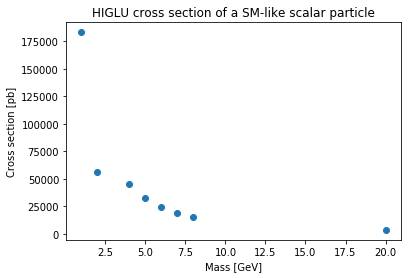

In [4]:
# CROSS SECTION

# Philip's Python Interface
#xsec_higlu_1 = [ 34950.2, 25042.8, 15118.9, 14845.8, 14620.2, 13521.5, 13100.8, 11115.4, 9126.8, 7702.1, 6750.3, 1998.8 ]

# HiGLU standalone
#mass_xsec_1 = np.array([1., 1.1, 1.2, 1.3, 1.5, 1.7, 1.8, 1.9, 2., 2.2, 2.4, 2.6, 2.8, 3., 3.3, 3.5, 3.8, 4., 5., 6., 7., 8.])
#mass_xsec_1 = np.array([1., 1.3, 1.7, 1.8, 1.9, 2., 2.2, 2.4, 2.6, 2.8, 3., 3.3, 3.5, 3.8, 4., 5., 6., 7., 8.])

xsec_higlu_1 = np.array([183357., 55940.7, 45607.8, 32940.1, 24445.4, 18944.6, 15327.4, 3674.1])
#xsec_higlu_1 = np.array([183357, 968517, 1268450, 31498, 560572, 58243, 48356, 55155, 55941, 53423, 51998, 51519, 52277, 55372, 54665, 52536, 48449, 45608, 32940, 24445, 18945, 15327])

plt.scatter(mass, xsec_higlu_1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Cross section [pb]')
plt.title("HIGLU cross section of a SM-like scalar particle")
plt.show()
#plt.tight_layout()
#plt.savefig('xsec_muR1_muF1_removedWeirdValues.pdf', dpi=1200)
#plt.savefig('xsec_muR1_muF1_removedWeirdValues.png', dpi=1200)


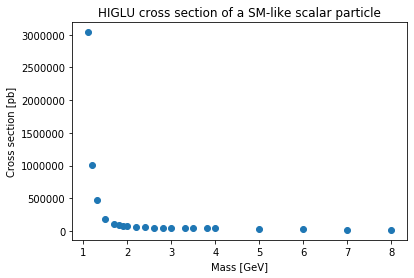

xsec_fit: 
 [3037930.0, 1006950.0, 476158.0, 332956.0, 189754.0, 150293.0, 110832.0, 97620.0, 80089.0, 70219.0, 65741.0, 61263.0, 58097.5, 54932.0, 52364.5, 49797.0, 49204.5, 48612.0, 49924.5, 51237.0, 50568.3, 49899.7, 49231.0, 48446.5, 47662.0, 46482.3, 45302.7, 44123.0, 42941.5, 41760.0, 40780.3, 39800.6, 38820.9, 37841.2, 36861.5, 35881.8, 34902.1, 33922.4, 32942.7, 31963.0, 31227.9, 30492.8, 29757.7, 29022.6, 28287.5, 27552.4, 26817.3, 26082.2, 25347.1, 24612.0, 24118.6, 23625.2, 23131.8, 22638.4, 22145.0, 21651.6, 21158.2, 20664.8, 20171.4, 19678.0, 19339.1, 19000.2, 18661.3, 18322.4, 17983.5, 17644.6, 17305.7, 16966.8, 16627.9, 16289.0]


In [5]:
# Philip's Python Interface
#xsec_higlu = [ 2511328.7, 139253.3, 15513.9, 13478.7, 13099.4, 11397.9, 10983.1, 9826.4, 8308.8, 7309.3, 6612.4, 1998.8 ]

mass_xsec = np.array([1.1, 1.2, 1.3, 1.5, 1.7, 1.8, 1.9, 2., 2.2, 2.4, 2.6, 2.8, 3., 3.3, 3.5, 3.8, 4., 5., 6., 7., 8.])
#xsec_higlu = np.array([187189000, 70218.5, 41759.7, 31963.1, 24611.6, 19677.9, 16289.3, 4140.2])
xsec_higlu = np.array([3037930, 1006950, 476158, 189754, 110832, 97620, 80089, 70219, 61263, 54932, 49797, 48612, 51237, 49231, 47662, 44123, 41760, 31963, 24612, 19678, 16289])
plt.scatter(mass_xsec, xsec_higlu)

plt.xlabel('Mass [GeV]')
plt.ylabel('Cross section [pb]')
plt.title("HIGLU cross section of a SM-like scalar particle")
plt.show()
#plt.tight_layout()
#plt.savefig('xsec_muR05_muF05_red_removed1.pdf', dpi=1200)
#plt.savefig('xsec_muR05_muF05_red_removed1.png', dpi=1200)

v_xsec = []

f_xsec = np.loadtxt("./new_higlu_xsec_fit_muR05_muF05.txt", delimiter = "\t")
#print("shape of data:", f_xsec.shape)
#print("datatype of data:", f_xsec.dtype)
#print("First 5 rows:\n", f_xsec[:5])

for nx in range(len(f_xsec)):
    # 1: values using linear fit in TGRaph; 2: values using spline
    v_xsec.append(f_xsec[nx][1])
    
print("xsec_fit: \n", v_xsec)


In [6]:
# MODEL INDEPENDENT LIMITS on the cross section in pb for different mass points (GeV): 1,2,4,5,6,7,8. 
# Validation: mS = 20 GeV

#obs_limit = [ 0.103242, 0.0958677, 0.120859, 0.0762025, 0.0827576, 0.0938192, 0.11963 ]
obs_limit = [ 0.103242, 0.0958677, 0.120859, 0.0762025, 0.0827576, 0.0938192, 0.11963, 0.15 ]

v_obs_limit = []
f_obs_limit = np.loadtxt("./CMS_modelIndependentLimits_red.txt", delimiter = "\t")
#print("shape of data:", f_br.shape)
#print("datatype of data:", f_br.dtype)
#print("First 5 rows:\n", f_br[:5])

for i in range(len(f_obs_limit)):
    v_obs_limit.append(round(f_obs_limit[i][1], 5))
print("Model independent observed limits: \n", v_obs_limit)


Model independent observed limits: 
 [0.08808, 0.0803, 0.08276, 0.08481, 0.08563, 0.08726, 0.09013, 0.093, 0.09628, 0.09587, 0.09628, 0.09464, 0.09505, 0.09669, 0.09874, 0.13766, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 9999.0, 0.12086, 0.08317, 0.07477, 0.07395, 0.07415, 0.07395, 0.07395, 0.07436, 0.07497, 0.07559, 0.0762, 0.07702, 0.07743, 0.07825, 0.07866, 0.07948, 0.0805, 0.08112, 0.08153, 0.08194, 0.08276, 0.08317, 0.08399, 0.08481, 0.08604, 0.08644, 0.08808, 0.08931, 0.09054, 0.09259, 0.09382, 0.09464, 0.09751, 0.09874, 0.10201, 0.10406, 0.10611, 0.11103, 0.11348, 0.11676, 0.11963]


In [7]:
# SinTheta LIMITS

senTheta_limit = []
for l in range(len(f_obs_limit)):  
    senTheta = math.sqrt(v_obs_limit[l] / (v_xsec[l] * v_br[l] * v_acc_amumu[l]))
    senTheta_limit.append(round(senTheta,5))
    
senTheta_limit



[0.00399,
 0.00643,
 0.00913,
 0.01089,
 0.01427,
 0.01612,
 0.01913,
 0.02079,
 0.02383,
 0.02572,
 0.02767,
 0.02909,
 0.03191,
 0.03459,
 0.03871,
 0.05232,
 16.79889,
 23.00125,
 42.8244,
 37.39128,
 17.57966,
 15.06468,
 13.97634,
 14.66015,
 20.27236,
 131.86276,
 24.61888,
 27.01891,
 52.90991,
 0.11504,
 0.08118,
 0.07168,
 0.07172,
 0.07464,
 0.07809,
 0.08196,
 0.08599,
 0.09013,
 0.09641,
 0.09986,
 0.10331,
 0.10599,
 0.10912,
 0.1116,
 0.11449,
 0.11738,
 0.12011,
 0.12249,
 0.12466,
 0.12791,
 0.12964,
 0.13176,
 0.13357,
 0.13576,
 0.13735,
 0.13998,
 0.14234,
 0.14437,
 0.14752,
 0.15009,
 0.15138,
 0.15475,
 0.15643,
 0.15974,
 0.16211,
 0.16498,
 0.16964,
 0.17242,
 0.17587,
 0.17904]

In [8]:
print("mass: ", len(v_mass))
print("obs lim: ", len(v_obs_limit))
print("xsec: ", len(v_xsec))
print("br: ", len(v_br))
print("acc: ", len(v_acc_amumu))
print("senTheta: ", len(senTheta_limit))

mass:  70
obs lim:  70
xsec:  70
br:  70
acc:  70
senTheta:  70


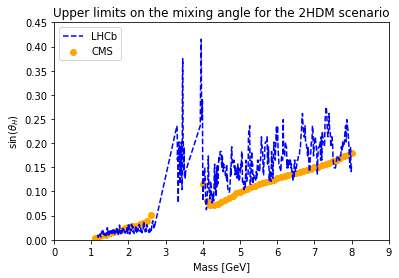

In [16]:
f_LHCb = np.loadtxt("./LHCb_limits.txt", delimiter = " ")
v_lim_LHCb = []
v_mass_LHCb = []
for i in range(len(f_LHCb)):
    v_mass_LHCb.append(f_LHCb[i][0]/1000) #Conversion from Mev to GeV
    v_lim_LHCb.append(f_LHCb[i][1])
    
#f_BaBar = np.loadtxt("./BaBar_limits.txt", delimiter = "\t")
#v_lim_BaBar = []
#v_mass_BaBar = []
#for i in range(len(f_BaBar)):
#    v_mass_BaBar.append(f_BaBar[i][0])
#    v_lim_BaBar.append(f_BaBar[i][1])

plt.xlim(0,9)
plt.ylim(0.0, 0.45)
plt.scatter(v_mass, senTheta_limit, color="orange", label = "CMS")
#plt.plot(v_mass_BaBar, v_lim_BaBar, color="red", label = "BaBar")
plt.plot(v_mass_LHCb, v_lim_LHCb, '--k', color="blue", label = "LHCb")
#plt.plot(v_mass_LHCb, v_lim_LHCb, '--k', color="lightskyblue", label = "LHCb")
plt.xlabel('Mass [GeV]')
plt.ylabel('sin($\\theta_{H}$)')
plt.title("Upper limits on the mixing angle for the 2HDM scenario")
plt.legend(loc="upper left")
plt.show()
#plt.savefig('senTheta_CMS_LHCB_red.pdf', dpi=1200)
#plt.savefig('senTheta_CMS_LHCB_red.png', dpi=1200)